In [25]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
%matplotlib inline

writing = pd.read_csv('letter-recognition.data')

writing


,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [26]:
x = writing.drop('T', axis = 1)
y = writing['T']
print(x)
y

       2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
0      5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
1      4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
2      7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
3      2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
4      4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
...   ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
19994  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
19995  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
19996  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
19997  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
19998  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8

[19999 rows x 16 columns]


0        I
1        D
2        N
3        G
4        S
        ..
19994    D
19995    C
19996    T
19997    S
19998    A
Name: T, Length: 19999, dtype: object

In [27]:
print(type(x))
x = OrdinalEncoder().fit_transform(x)
print(type(x))
print(y)
encoder=LabelEncoder()
# y = encoder.fit_transform(y)

# for i in range (0,26):
    
#     print('{0}: {1}'.format(i,encoder.inverse_transform([i]))




<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
0        I
1        D
2        N
3        G
4        S
        ..
19994    D
19995    C
19996    T
19997    S
19998    A
Name: T, Length: 19999, dtype: object


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train

array([[ 5.,  6.,  6., ..., 10.,  6.,  5.],
       [ 3.,  8.,  5., ...,  9.,  6.,  7.],
       [ 4.,  4.,  6., ...,  7.,  3.,  7.],
       ...,
       [ 3.,  3.,  5., ...,  5.,  2.,  7.],
       [ 7.,  9.,  9., ...,  9.,  9., 11.],
       [ 3.,  5.,  5., ...,  8.,  1.,  7.]])

In [29]:
svm = SVC(kernel='rbf', gamma=0.1, C=10.0, random_state=1,probability=True)
svm.fit(x_train, y_train)


SVC(C=10.0, gamma=0.1, probability=True, random_state=1)

In [30]:
prediction=svm.predict(x_test) 
svm.score(x_test, y_test)


0.9695

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           A       0.99      1.00      1.00       171
           B       0.93      0.94      0.93       159
           C       0.99      0.98      0.99       148
           D       0.97      0.94      0.96       152
           E       0.99      0.97      0.98       145
           F       0.96      0.99      0.98       145
           G       0.98      0.99      0.99       155
           H       0.95      0.93      0.94       158
           I       0.97      0.99      0.98       161
           J       0.98      0.96      0.97       163
           K       0.95      0.94      0.94       144
           L       0.99      0.99      0.99       143
           M       0.97      0.99      0.98       148
           N       0.97      0.97      0.97       157
           O       0.97      0.98      0.97       157
           P       0.99      0.95      0.97       177
           Q       0.99      0.99      0.99       158
           R       0.90    

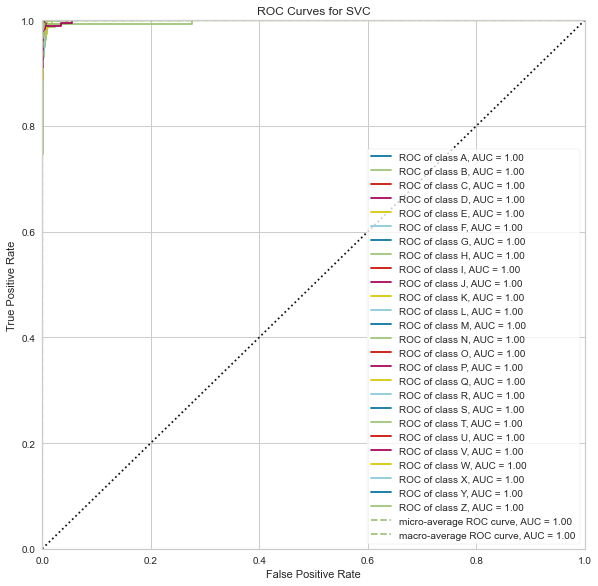

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
class_list=np.unique(y)
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(svm, classes=class_list, size=(700,700))
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()

In [19]:
print(confusion_matrix(y_test,prediction))
 

[[171   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 150   0   1   0   0   0   0   0   0   1   0   1   0   0   0   0   2
    0   0   0   4   0   0   0   0]
 [  0   0 145   0   1   0   1   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 143   0   0   0   2   0   0   0   0   0   4   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   2   0   0 140   0   1   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 144   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   1   0   0   0   0 154   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   1 147   0   1   1   0   0   1   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 159   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  